<a href="https://colab.research.google.com/github/Manash-Christ/AML-Trimester-2/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
# read data
df = pd.read_csv('data/lab1.csv')
df

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,12.80230,0.0,18.10,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
502,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
503,6.28807,0.0,18.10,0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
504,9.92485,0.0,18.10,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6


## Basic EDA

#### SIMPLE REG

While the independent variable seems to be normally distributed, the dependent variable seems not so. The JB test will bulid upon these findings


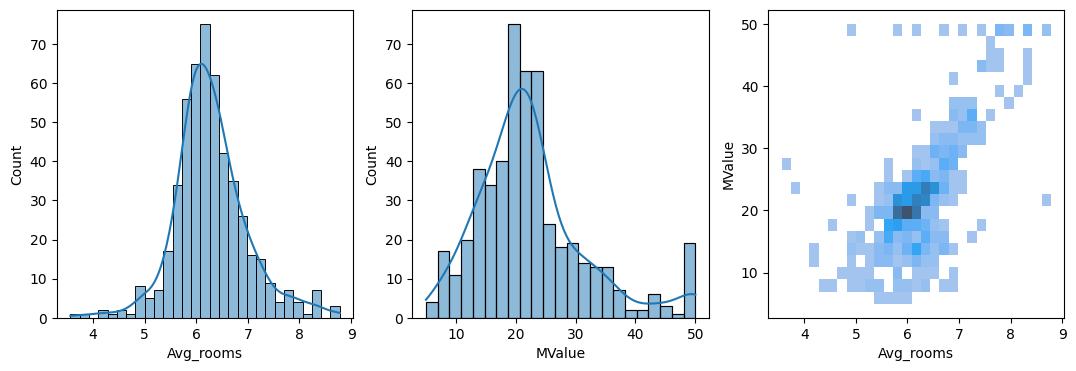

In [ ]:
# Checking the distribution type of dependent and independent variable.

#for Simple reg
X = df.Avg_rooms
Y = df.MValue


f, ax = plt.subplots(1,3,figsize=(13,4))
sns.histplot(x=X,kde=True,ax=ax[0])
sns.histplot(x=Y,kde=True,ax=ax[1])
sns.histplot(x=X,y=Y,ax=ax[2],kde=True)
print("While the independent variable seems to be normally distributed, the dependent variable seems not so. The JB test will bulid upon these findings")

#### MULTIPLE REG

Text(0.5, 1.0, 'How independent variables relate to the dependent variable')

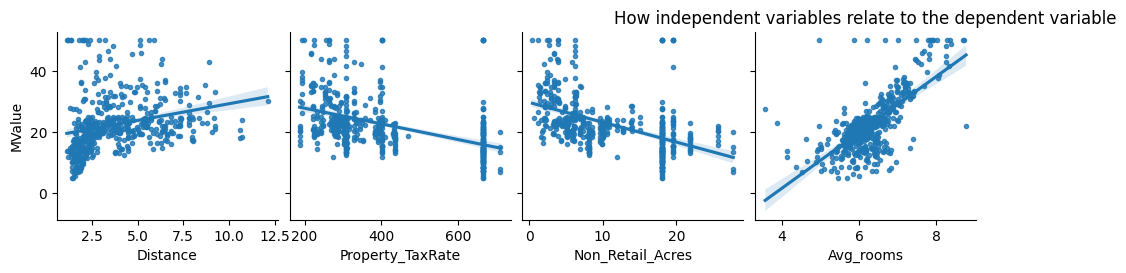

In [ ]:
# How independent variables relate to the dependent variable
cols = ['Distance', 'Property_TaxRate', 'Non_Retail_Acres', 'Avg_rooms']
sns.pairplot(df,x_vars=cols,y_vars=['MValue'],kind='reg', markers='.')
plt.title("How independent variables relate to the dependent variable")

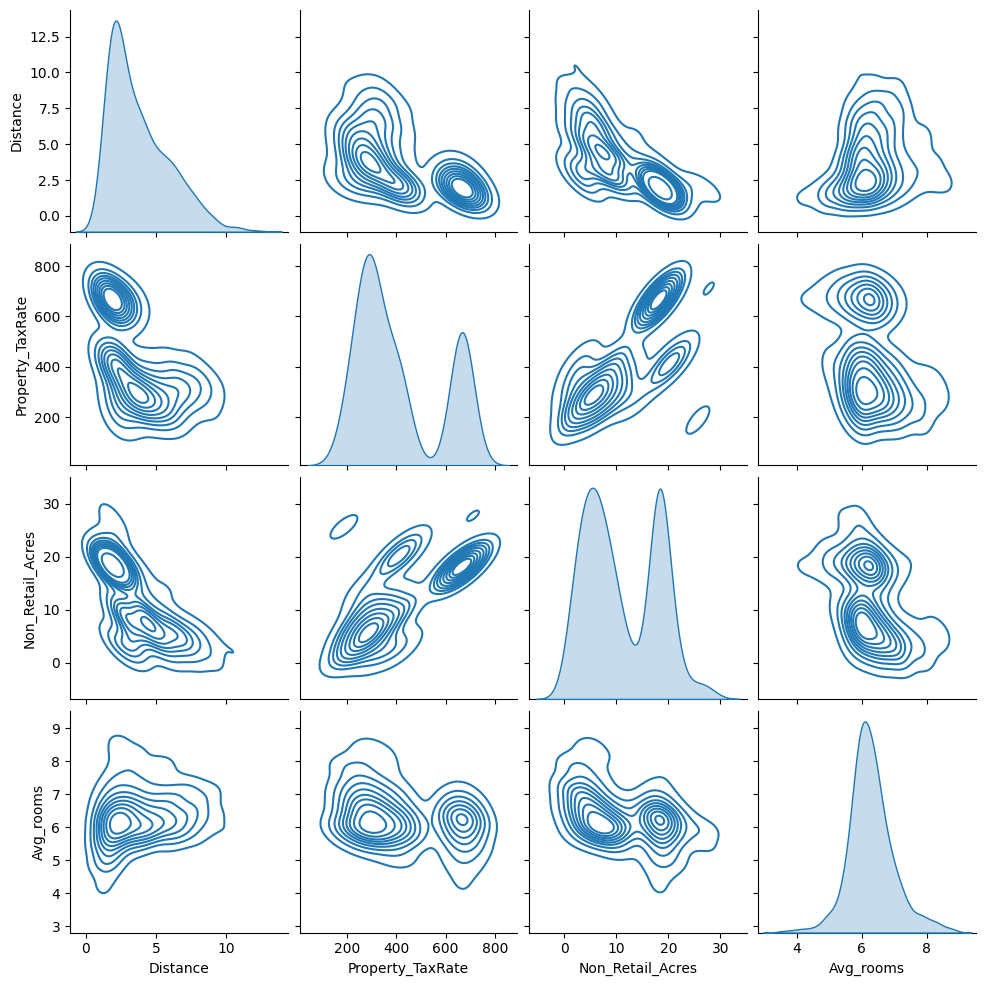

In [ ]:
# How independent variables relate to each other
sns.pairplot(df,vars=cols,kind='kde')

#### Formal test for normality

In [ ]:
# Jarque-Bera Test for normality
from statsmodels.stats.stattools import jarque_bera as jb
def norm(X):
    res = jb(X)

    print(f"The JB test statistic is {res[0]} with a p-value of {res[1]}. Estimated Skew and kurtosis are {res[2]} and {res[3]} respectively.")

    if res[1] <0.05:
        print("The feature is normal")
    else:
        print("Feature is not normal")

for i in cols+['MValue']:
    print(f"Column: {i}")
    norm(df[i])
    print("\n")

Column: Distance
The JB test statistic is 90.50359562358396 with a p-value of 2.2253273938319152e-20. Estimated Skew and kurtosis are 1.0087787565152246 and 3.4712985716109914 respectively.
The feature is normal


Column: Property_TaxRate
The JB test statistic is 65.17155353328512 with a p-value of 7.0498026834411586e-15. Estimated Skew and kurtosis are 0.6679682687237771 and 1.8570151151647996 respectively.
The feature is normal


Column: Non_Retail_Acres
The JB test statistic is 39.360810801190894 with a p-value of 2.837321395050848e-09. Estimated Skew and kurtosis are 0.2941462768441845 and 1.7667815284370616 respectively.
The feature is normal


Column: Avg_rooms
The JB test statistic is 86.6772023434669 with a p-value of 1.5075948933793572e-19. Estimated Skew and kurtosis are 0.40241466802496245 and 4.861026972531025 respectively.
The feature is normal


Column: MValue
The JB test statistic is 148.41187223926912 with a p-value of 5.9261333366041575e-33. Estimated Skew and kurtosis

#### Outlier detection

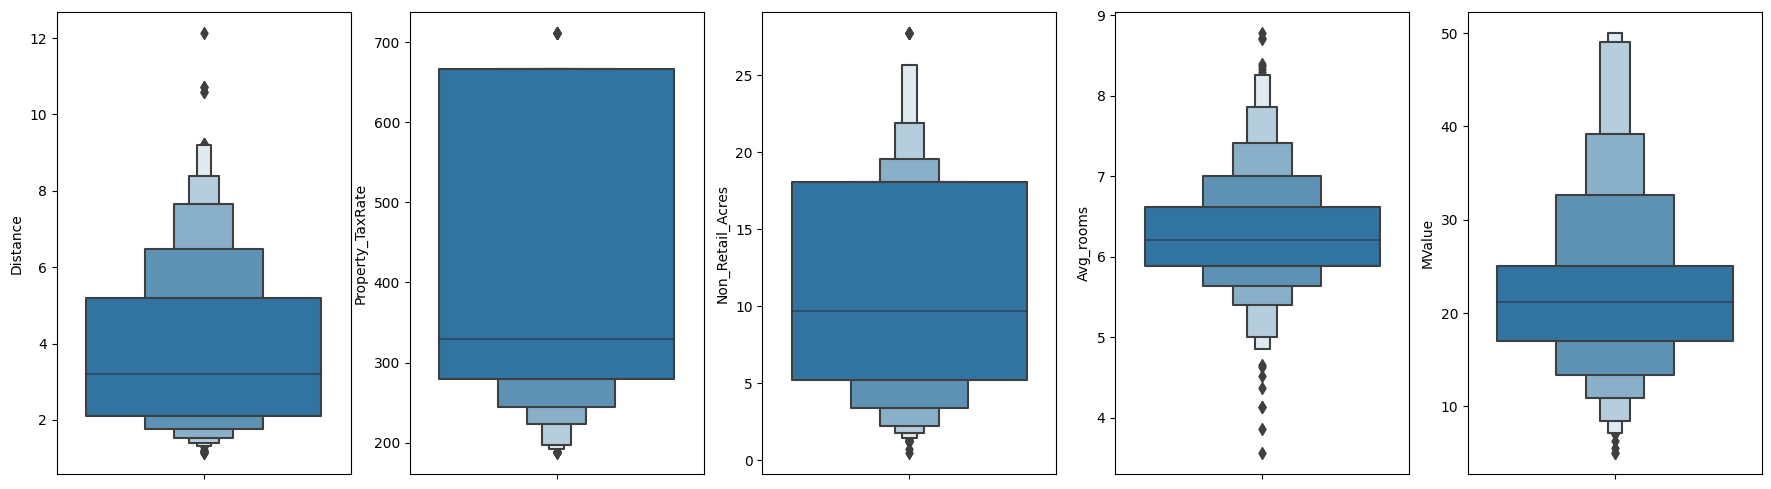

In [ ]:
#box plots
f,a = plt.subplots(1,5,figsize=(22,6))
for j,i in enumerate(cols+['MValue']):
    sns.boxenplot(y=df[i],ax=a[j])
q1 = df[cols+['MValue']].quantile(0.25)
q3 = df[cols+['MValue']].quantile(0.75)
iqr = q3 - q1

## Building the model from Normal Equations

#### SIMPLE REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split as ttt
xtr,xte,ytr,yte = ttt(X,Y,test_size=0.3)

In [ ]:
print("Regression coefficients from training dataset")
print("First Normal eqn --> SUM(Yi) = nB0 + B2SUM(Xi)")
print("Second Normal eqn --> SUM(XiYi) = B0SUM(Xi) + B1SUM(Xi**2)")
print("B1 --> SUM(xiyi)/SUM(xi**2)")
print("B0 --> mean(Y) - B1*mean(X)")
print("-----------------------------")
n = len(xtr)
b1 = (n*np.sum(xtr*ytr) - np.sum(xtr)*np.sum(ytr)) / (n*np.sum(xtr**2) - (np.sum(xtr))**2)
b0 = np.mean(ytr) - b1*np.mean(xtr)
print(f"The OLS estimates for this regression problem are:\nSlope - The mean value of the house increases by {b1} with one additional room\nIntercept - The mean value of house with no room is {b0}")

Regression coefficients from training dataset
First Normal eqn --> SUM(Yi) = nB0 + B2SUM(Xi)
Second Normal eqn --> SUM(XiYi) = B0SUM(Xi) + B1SUM(Xi**2)
B1 --> SUM(xiyi)/SUM(xi**2)
B0 --> mean(Y) - B1*mean(X)
-----------------------------
The OLS estimates for this regression problem are:
Slope - The mean value of the house increases by 9.14420402149792 with one additional room
Intercept - The mean value of house with no room is -34.75182656659301


##### Test

Text(0.5, 1.0, 'Performance on testing dataset')

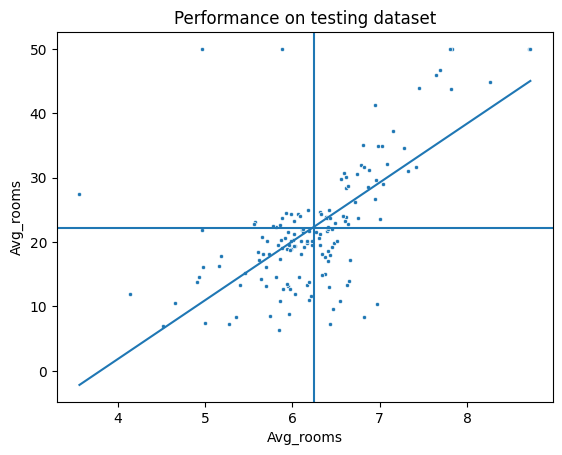

In [ ]:
yhat = b0 + b1*xte
sns.lineplot(x=xte,y=yhat)
sns.scatterplot(x=xte,y=yte,marker='.')
plt.axhline(np.mean(yte))
plt.axvline(np.mean(xte))
plt.title("Performance on testing dataset")

#### MULTIPLE REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split as ttt
xtrm,xtem,ytrm,ytem = ttt(df[cols],Y,test_size=0.3)

In [ ]:
import statsmodels.api as sm
model = sm.OLS(ytrm,xtrm)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 MValue   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              1280.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):                   1.87e-207
Time:                        09:44:52   Log-Likelihood:                         -1143.8
No. Observations:                 354   AIC:                                      2296.
Df Residuals:                     350   BIC:                                      2311.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Distance            -0.7960      0.195     -4.072      0.000      -1.180      -0.412
Property_TaxRate    -0.0130      0.003     -4.690      0.000      -0.018      -0.008
Non_Retail_Acres    -0.3691      0.076     -4.843      0.000      -0.519      -0.219
Avg_rooms            5.5747      0.214     26.032      0.000       5.154       5.996
==============================================================================
Omnibus:                      192.624   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1640.505
Skew:                           2.134   Prob(JB):                         0.00
Kurtosis:                      12.644   Cond. No.                         372.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
yh = res.predict(exog=xtem)
um = ytem - yh

## CLNRM Assumptions

#### 1. Linearity in parameters

In [ ]:
print("Since the model is of the form y=b0+b1x1+b2x2+b3x3+b4x4+e;\nb0 and b1, etc are linearly dependent on Y.")

Since the model is of the form y=b0+b1x1+b2x2+b3x3+b4x4+e;
b0 and b1, etc are linearly dependent on Y.


#### 2. Non-Stochastic independent variable

In [ ]:
print("The independent variable samples should be done independent of error or should be fixed in repeated sampling")

The independent variable samples should be done independent of error or should be fixed in repeated sampling


In [ ]:
print("The covariance of X and error should be zero")

The covariance of X and error should be zero


In [ ]:
#error
u = yte - yhat
cov = np.cov(xte,u)

print(f"The covariance matrix  for SLR clearly shows that the independent variable and the error term are independently distributed\nwith almost zero covariance {cov[0][1]}.\
 Also note the variance of X = {cov[0][0]} and u = {cov[1][1]}.")
for i in xtem:
    cov2 = np.cov(xtem[i],um)
    print(f"\nThe covariance matrix for MLR '{i}' clearly shows that the independent variable and the error term are independently distributed\nwith almost zero covariance {cov[0][1]}.\
     Also note the variance of X = {cov2[0][0]} and u = {cov2[1][1]}.")

The covariance matrix  for SLR clearly shows that the independent variable and the error term are independently distributed
with almost zero covariance -0.5282986341496124. Also note the variance of X = 0.5590148726036944 and u = 59.25826440590014.

The covariance matrix for MLR 'Distance' clearly shows that the independent variable and the error term are independently distributed
with almost zero covariance -0.5282986341496124.     Also note the variance of X = 3.991505567406323 and u = 40.1878306393859.

The covariance matrix for MLR 'Property_TaxRate' clearly shows that the independent variable and the error term are independently distributed
with almost zero covariance -0.5282986341496124.     Also note the variance of X = 29023.14321192053 and u = 40.1878306393859.

The covariance matrix for MLR 'Non_Retail_Acres' clearly shows that the independent variable and the error term are independently distributed
with almost zero covariance -0.5282986341496124.     Also note the variance 

#### 3. Zero mean value of error

#### SLR

Another assumption of the CLNRM model is that the error term should be a normal gaussian distribution with zero mean and sigma variance.
The mean of error is 4.973799150320701e-12 and the variance 'sigma' is 43.69960838381193


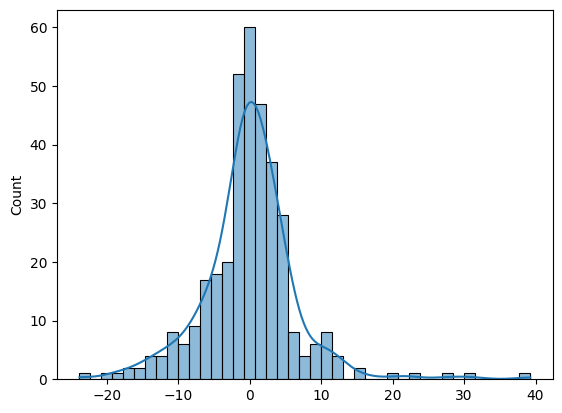

In [ ]:
print(f'Another assumption of the CLNRM model is that the error term should be a normal gaussian distribution with zero mean and sigma variance.')
sns.histplot(x=u,kde=True)
print(f"The mean of error is {np.sum(u)} and the variance 'sigma' is {np.var(u)}")

#### MLR

For MLR, normal gaussian distribution with zero mean and sigma variance.
The mean of error is -6.8761463699780165 and the variance 'sigma' is 39.92343701675834


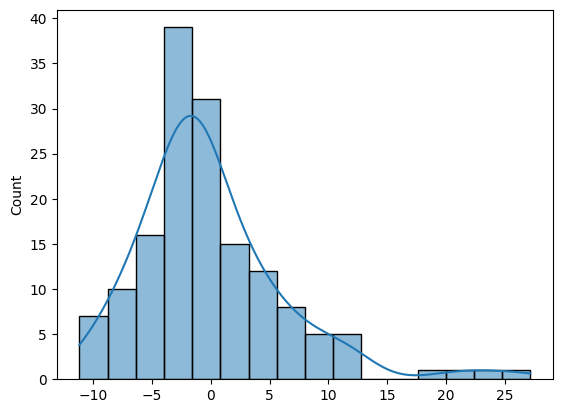

In [ ]:
print(f'For MLR, normal gaussian distribution with zero mean and sigma variance.')
sns.histplot(x=um,kde=True)
print(f"The mean of error is {np.sum(um)} and the variance 'sigma' is {np.var(um)}")

#### 4. HomoSkedasticity in Regression

#### SLR

Text(0.5, 1.0, 'Independent vs dependent scatter plot')

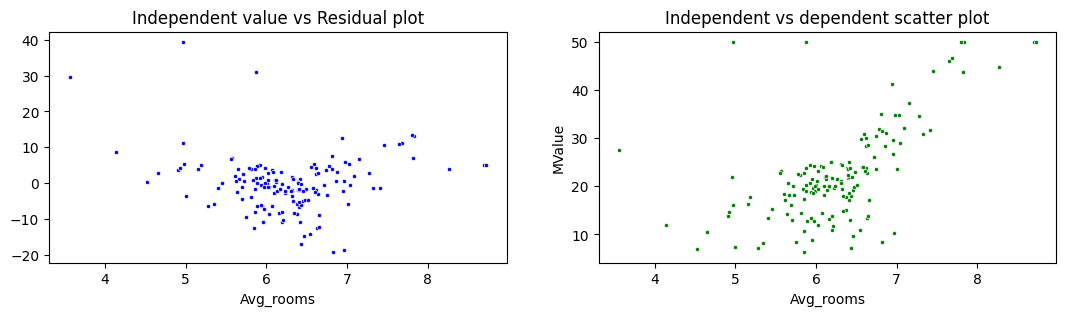

In [ ]:
# residual plot
f,a = plt.subplots(1,2,figsize=(13,3))
sns.scatterplot(x=xte,y=u,color='b',marker='.',ax=a[0]);a[0].set_title("Independent value vs Residual plot")
sns.scatterplot(x=xte,y=yte,color='g',marker='.',ax=a[1]);a[1].set_title("Independent vs dependent scatter plot")

#### MLR

Text(0.5, 1.0, 'MLR: Fitted value vs Residual plot')

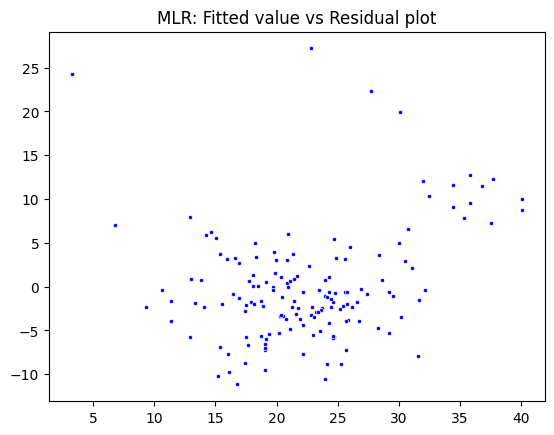

In [ ]:
sns.scatterplot(x=yh,y=um,color='b',marker='.');plt.title("MLR: Fitted value vs Residual plot")


In [ ]:
# formal test for heteroskedasticity
# White test;
# Run the regression of the squared residual with all the linear and non-linear combinations of the features. [u^2 ~ b0 + b1*x + b2*x^2]. If nR^2
#from statsmodels.stats.diagnostic import het_white as het
#test = het(res.resid,res.model.exog)
# Breusch-Pagan test;
from statsmodels.stats.diagnostic import het_breuschpagan as bhet
import statsmodels.api as smi
c = smi.tools.tools.add_constant(xtem)
c.shape,yh.shape
test2 = bhet(um,c)
if het(um, c)[1] > 0.05:
    print("White test outcome at 5% signficance: homoscedastic")
else:
    print("White test outcome at 5% signficance: heteroscedastic")
print("\n")
if bhet(um, c)[1] > 0.05:
    print("breusch-pagan test outcome at 5% signficance: homoscedastic")
else:
    print("breusch-pagan test outcome at 5% signficance: heteroscedastic")

White test outcome at 5% signficance: heteroscedastic


breusch-pagan test outcome at 5% signficance: heteroscedastic


#### 5. No Autocorrelation among error terms

#### SLR

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.06081546, -0.00233945, -0.09615645,  0.01539738, -0.04232067,
         0.01250798, -0.21741948, -0.11282519, -0.06667978,  0.09990873,
         1.        ,  0.09990873, -0.06667978, -0.11282519, -0.21741948,
         0.01250798, -0.04232067,  0.01539738, -0.09615645, -0.00233945,
        -0.06081546]),
 <matplotlib.lines.Line2D at 0x7f78232c87c0>)

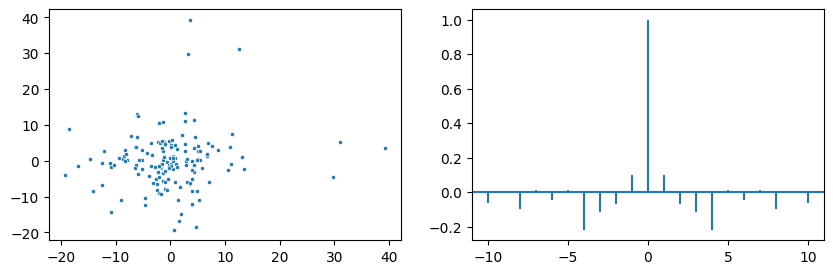

In [ ]:
f,a = plt.subplots(1,2,figsize=(10,3))
sns.scatterplot(x=u,y=u.shift(1),marker='.',ax=a[0])
plt.acorr(u,maxlags=10)

In [ ]:
# formal test for autocorrelation

from statsmodels.stats.diagnostic import acorr_ljungbox as acrr
from statsmodels.stats.stattools import durbin_watson as db


test = acrr(u,1)

if test.loc[1][1] < 0.05:
    print(f"With L-B stat of {test.loc[1][0]} and corresponding p-value of {test.loc[1][1]}, There is no auto correlation in the model")
else:
    print("Auto correlation exists")

if db(u)>2:
    print("Negative correlation")
else:
    print("Positive correlation")


Auto correlation exists
Positive correlation


#### MLR

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([-0.05944891, -0.11352767, -0.12302819,  0.05008219, -0.04149207,
        -0.10317405, -0.09364317,  0.0266787 , -0.01033776, -0.04115755,
         1.        , -0.04115755, -0.01033776,  0.0266787 , -0.09364317,
        -0.10317405, -0.04149207,  0.05008219, -0.12302819, -0.11352767,
        -0.05944891]),
 <matplotlib.lines.Line2D at 0x7f781ea3a8f0>)

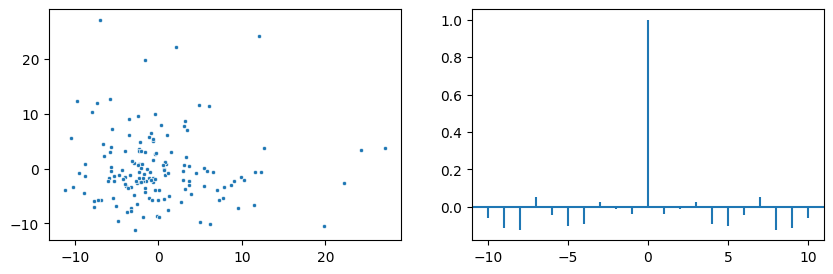

In [ ]:
f,a = plt.subplots(1,2,figsize=(10,3))
sns.scatterplot(x=um,y=um.shift(1),marker='.',ax=a[0])
plt.acorr(um,maxlags=10)

In [ ]:
print("For MLR: \n")
if acrr(um,1).loc[1][1] < 0.05:
    print("No Auto correlation")
elif db(um)>2:
    print("Negative correlation")
else:
    print("Positive correlation")

For MLR: 

Negative correlation


#### 6. Number of observations strictly greater than the number of parameters

In [ ]:
len(X)>2

#### 7. No Extreme outliers and finite variance

In [ ]:
print("No extreme outliers are present")

No extreme outliers are present


## Precision and standard error of estimates

#### SLR

In [ ]:
#Variance of slope estimate
ex2 = np.sum((xte - xte.mean())**2)
seb1 = np.var(u)/ex2
covb1b2 = -(xte.mean())*seb1
print(f'Variance of slope estimate is {seb1} and the covariance between b0 and b1 is {covb1b2}')

Variance of slope estimate is 0.6974000545899233 and the covariance between b0 and b1 is -4.356630612073728


In [ ]:
TSS = np.sum((Y - Y.mean())**2)
RSS = np.sum(u**2)
ESS = TSS - RSS
r_sqr = ESS/TSS
print(f"The coefficient of determination is {r_sqr} and MSE is {RSS/len(df-1)}")

## Interval Estimates and hypothesis testing

In [ ]:
np.log(X).hist()

## BLUE Property and Gauss-Markov Theorem

In [ ]:
# Unbaised

In [ ]:
# Minimum Variance

In [ ]:
# Consistent

## Multiple Variable case

In [ ]:
# selected variables
cols = ['Distance', 'Property_TaxRate', 'Non_Retail_Acres', 'Avg_rooms']

In [ ]:
df[cols].hist()

In [ ]:
#sns.scatterplot(x=df['Distance'],y=Y)
z = np.log(df['Distance'])
sns.scatterplot(x=z,y=Y)

In [ ]:
from sklearn.linear_model import LinearRegression as li
lr = li()
lr.fit(df[cols],Y)


In [ ]:
# Normalize
norm = (df[cols] - df[cols].max())/(df[cols].max() - df[cols].min())
norm

## Testing

In [ ]:
from sklearn.linear_model import LinearRegression as li
lr = li()
X = X.array.reshape(-1,1)
lr.fit(X,Y)

In [ ]:
lr.coef_

In [ ]:
lr.intercept_